In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [6]:
baseUrl= "http://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval")
print("---------------------------------------------")
counter = 1
counter1 =1
flag = True
for city in cities:
    if counter == 51:
        counter = 0
        flag = False
        counter1+= 1
    elif counter == 50 and flag == False:
        counter = 0
        counter1 += 1
        
        
    params={"units":"imperial",
            "appid":api_key,
            "q":city,
            "units":"imperial"
           }
    response = requests.get(baseUrl, params=params)
    
    print("Processing Record "+str(counter)+" of Set "+str(counter1)+" | " + city  )
    print(response.url)
    if (response.ok == False):
        print("City not Found. Skipping...")
    counter +=1
print("---------------------------------------------")
print("Data Retrievel Complete")
print("----------------------------------------------")



Beginning Data Retrieval
---------------------------------------------
Processing Record 1 of Set 1 | inuvik
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=5d88542298a72687683f21bf7094fb9f&q=inuvik
Processing Record 2 of Set 1 | castro
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=5d88542298a72687683f21bf7094fb9f&q=castro
Processing Record 3 of Set 1 | bethel
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=5d88542298a72687683f21bf7094fb9f&q=bethel
Processing Record 4 of Set 1 | ukiah
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=5d88542298a72687683f21bf7094fb9f&q=ukiah
Processing Record 5 of Set 1 | launceston
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=5d88542298a72687683f21bf7094fb9f&q=launceston
Processing Record 6 of Set 1 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=5d88542298a72687683f21bf7094fb9f&q=tuktoyaktuk
Processing Record 7 of Se

In [7]:
df = pd.DataFrame()
df["City"]=cities
df["Cloudiness"]=""
df["Country"]=""
df["Date"]=""
df["Humidity"]=""
df["Lat"]=""
df["Lng"]=""
df["Max Temp"]=""
df["Wind Speed"]=""
print(df.count())
url= "http://api.openweathermap.org/data/2.5/weather?"
params = {"units":"imperial",
          "appid":api_key
         }
for index, row in df.iterrows():
    city_name = row["City"]
    params["q"]=city_name
    response_df = requests.get(url, params = params).json()
    try:
        df.loc[index, "Cloudiness"] = response_df["clouds"]["all"]
        df.loc[index, "Country"]=response_df["sys"]["country"]
        df.loc[index, "Date"]=response_df["dt"]
        df.loc[index, "Humidity"]= response_df["main"]["humidity"]
        df.loc[index, "Lat"]= response_df["coord"]["lat"]
        df.loc[index, "Lng"]= response_df["coord"]["lon"]
        df.loc[index, "Max Temp"]= response_df["main"]["temp_max"]
        df.loc[index, "Wind Speed"] = response_df["wind"]["speed"]
    except KeyError:
        print("missing field/results....skipping")
df
    
    
          



City          613
Cloudiness    613
Country       613
Date          613
Humidity      613
Lat           613
Lng           613
Max Temp      613
Wind Speed    613
dtype: int64
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing field/results....skipping
missing f

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,inuvik,90,CA,1571809635,92,68.36,-133.71,19.4,2.24
1,castro,0,CL,1571809635,86,-42.48,-73.76,41,9.17
2,bethel,1,US,1571809635,82,60.79,-161.76,39.2,19.46
3,ukiah,1,US,1571809456,55,39.15,-123.21,66.99,3.31
4,launceston,45,AU,1571809636,42,-41.43,147.14,66.2,19.46
...,...,...,...,...,...,...,...,...,...
608,tahta,,,,,,,,
609,hay river,75,CA,1571809836,76,60.82,-115.79,32,6.93
610,tura,100,RU,1571809836,88,64.27,100.22,15.21,4.68
611,chhatarpur,100,IN,1571809837,44,24.92,79.59,79.48,3.36


In [8]:
df.to_csv("city data.csv")

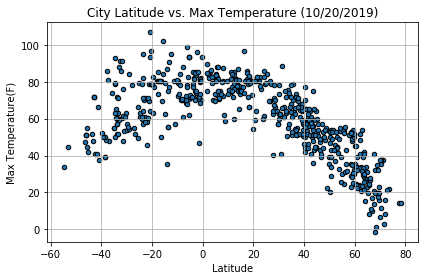

In [9]:
# Lattitude vs Temperature PLot
df['Lat'] = pd.to_numeric(df['Lat'])
df["Max Temp"] = pd.to_numeric(df["Max Temp"])

ax=df.plot(kind="scatter",x="Lat",y="Max Temp",alpha =1,edgecolor="black" )


ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature(F)")
ax.set_title("City Latitude vs. Max Temperature (10/20/2019)")
plt.tight_layout()
plt.savefig("lat_vs_tem.png")
plt.show()

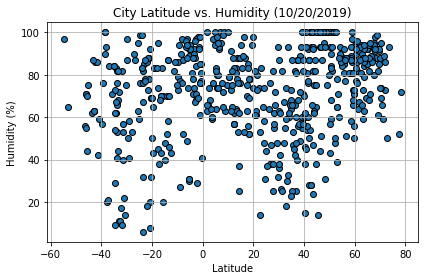

In [10]:
# #Latitude vs Humidity Plot
df['Humidity'] = pd.to_numeric(df['Humidity'])
plt.grid()
plt.scatter(df["Lat"],df["Humidity"], alpha =1, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (10/20/2019)")
plt.tight_layout()
plt.savefig("lat_vs_Humidity.png")
plt.show()

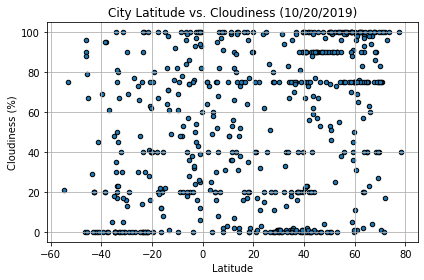

In [11]:
# Latitude vs Cloudiness Plot

df['Cloudiness'] =pd.to_numeric(df['Cloudiness'])
ax = df.plot(kind ="scatter", x = "Lat", y ="Cloudiness",edgecolor="black")
ax.grid()
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("City Latitude vs. Cloudiness (10/20/2019)")
plt.tight_layout()
plt.savefig("lat_vs_cloudiness.png")

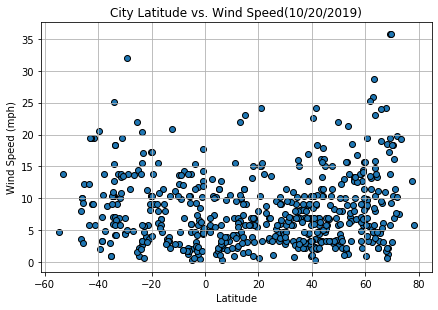

In [12]:
# Latitude vs. Wind Speed Plot
df["Wind Speed"]=pd.to_numeric(df["Wind Speed"])
plt.grid()
plt.scatter(df["Lat"], df["Wind Speed"], edgecolor="black")
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed(10/20/2019)")
plt.savefig("lat_vs_windSpeed.png")